In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
data1=pd.read_csv("../input/hotel-bookings/hotel_bookings-hotel_bookings.csv")
data1.sample(10) #random rows


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
113599,City Hotel,0,35,2017,June,23,7,0,2,2,...,No Deposit,9.0,NaN,0,Transient,159.00,0,1,Check-Out,2017-06-09
615,Resort Hotel,1,44,2015,July,30,22,0,4,2,...,No Deposit,240.0,NaN,0,Transient,195.00,0,1,Canceled,2015-06-09
67316,City Hotel,1,157,2017,May,18,1,1,3,2,...,Non Refund,3.0,NaN,0,Transient,130.00,0,0,Canceled,2016-11-25
26108,Resort Hotel,0,132,2016,July,30,18,1,3,2,...,No Deposit,196.0,NaN,0,Transient-Party,196.50,0,0,Check-Out,2016-07-22
54738,City Hotel,1,174,2016,July,31,25,1,2,2,...,No Deposit,28.0,NaN,0,Transient-Party,130.00,0,1,Canceled,2016-02-03
115305,City Hotel,0,13,2017,July,27,3,1,0,2,...,No Deposit,9.0,NaN,0,Transient,120.00,0,1,Check-Out,2017-07-04
92539,City Hotel,0,76,2016,July,28,4,1,3,2,...,No Deposit,7.0,NaN,0,Transient,99.73,0,2,Check-Out,2016-07-08
44387,City Hotel,0,88,2015,October,41,5,1,1,2,...,No Deposit,26.0,NaN,77,Transient-Party,112.20,0,0,Check-Out,2015-10-07
77497,City Hotel,0,263,2015,September,39,21,1,0,2,...,No Deposit,21.0,NaN,0,Transient-Party,67.00,0,0,Check-Out,2015-09-22
50355,City Hotel,1,117,2016,April,18,29,0,2,2,...,No Deposit,11.0,NaN,0,Transient,72.67,0,0,Canceled,2016-01-03


In [4]:
data1.shape #properties and shape

(119390, 32)

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data1.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

In [7]:
data1.isnull().any() #check for null values

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [35]:
data1.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [33]:
(data1.isnull().sum()).sum() #total number of null values in dataset

112593

In [8]:
data1.isnull().sum() #number of null values in each column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [86]:
bins=pd.cut(data1['arrival_date_week_number'],6,labels=["0-9 weeks","9-18 weeks","18-27 weeks","27-36 weeks","36-45 weeks","45-54 weeks"])
pd.value_counts(bins,sort=False)


0-9 weeks      14408
9-18 weeks     21807
18-27 weeks    23424
27-36 weeks    23702
36-45 weeks    22114
45-54 weeks    13935
Name: arrival_date_week_number, dtype: int64

In [87]:
bins.dtype


CategoricalDtype(categories=['0-9 weeks', '9-18 weeks', '18-27 weeks', '27-36 weeks',
                  '36-45 weeks', '45-54 weeks'],
                 ordered=True)

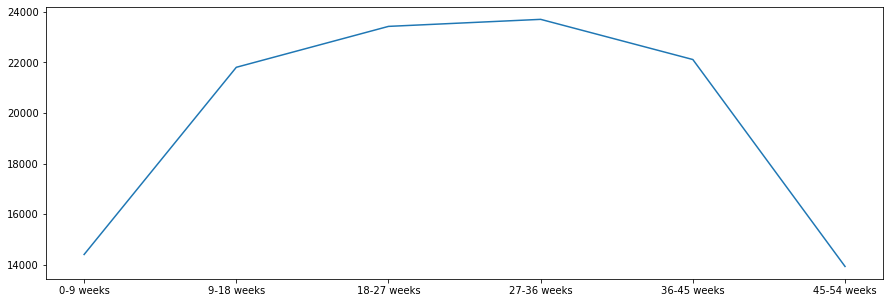

In [88]:
plt.figure(figsize=(15,5))
pd.value_counts(bins,sort=False).plot()


In [84]:
#bins[bins.value_counts()].max()

In [90]:
print("most number of guests visited are",pd.value_counts(bins).max())

most number of guests visited are  23702


In [17]:
data1['children'].fillna(0,inplace=True) #replace null values of children with 0

In [16]:
data1['children'].isnull().any()

False

In [20]:
data1['country'].fillna(method='ffill',inplace=True) #replace null values of country by last value

In [21]:
data1['country'].isnull().any()

False

In [24]:
l1=((data1['agent']).mean(skipna=True))
data1['agent'].fillna(l1,inplace=True) #Replace the null values in the “agent” column by mean of that column.

In [25]:
data1['agent'].isnull().sum() #checking the number of null values present in agent column

0

In [26]:
no_hotel=data1['hotel'].unique()
len(no_hotel) #number of different hotel types

2

In [27]:
no_ct=data1['customer_type'].unique()
len(no_ct) ##number of different customer types

4

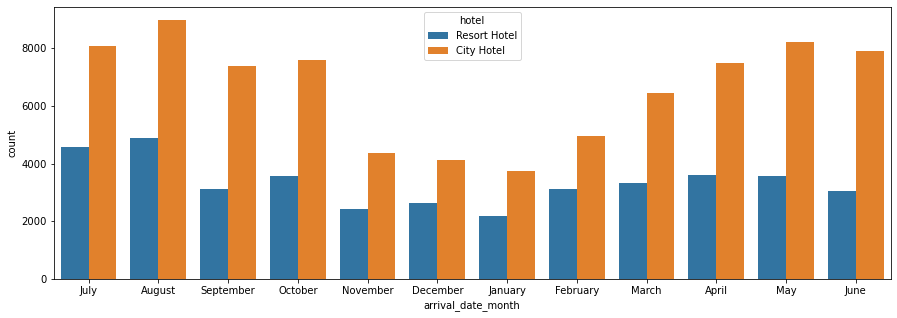

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='arrival_date_month',hue='hotel',data=data1)